https://dev.to/yash_makan/how-to-predict-future-using-python--3i39

https://www.digitalocean.com/community/tutorials/how-to-install-the-anaconda-python-distribution-on-ubuntu-20-04-pt


#### Different Models of Predictive Analysis
ARIMA - Auto-Regressive Integrated Moving Average

LSTM - Long Short Term Memory

Auto-Regressive model

Exponential Smoothing


##### But why fbprophet?
I know you must be thinking that why do we are using a third party Facebook library if we already have these models. The problem with these models is that you have to tweak the parameters to see which way yields the best result whereas fbprophet lets all of this work on its own. It is a simple yet powerful library in which you simply has to pass the historical data and it can predict the future.

In [1]:
#pip install pystan

In [2]:
#pip install fbprophet

In [3]:
from influxdb import InfluxDBClient
import pystan
from prophet import Prophet
import pandas as pd

C:\Users\pitha\anaconda3\envs\bit-ml-influxdb\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
db = 'db_dados_sensores'
measurement = 'bit_leaf2'
db_influx = InfluxDBClient(host='bitsaas-dns-vm-iot.eastus2.cloudapp.azure.com', port=8086, ssl=True, verify_ssl=True)
db_influx.switch_database(db)

In [5]:
query = "SELECT * FROM "+measurement+" WHERE (\"sensorname\" = 'led') limit 100000"

In [6]:
df = pd.DataFrame(db_influx.query(query, chunked=True, chunk_size=10000).get_points()) 

In [7]:
#df_default = df[["time", "value"]]
df_default = df[["updtime", "value"]]

In [8]:
df_default["updtime"] = pd.to_datetime(df_default['updtime'], unit='ms')

C:\Users\pitha\AppData\Local\Temp/ipykernel_37440/4247146035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_default["updtime"] = pd.to_datetime(df_default['updtime'], unit='ms')


In [9]:
df_default = df_default.rename(columns={'updtime':'ds','value':'y'})

In [10]:
df_default

,ds,y
0,2022-03-03,25
1,2022-03-02,28
2,2022-03-01,29
3,2022-02-28,26
4,2022-02-27,25
...,...,...
360,2021-03-08,28
361,2021-03-07,28
362,2021-03-06,25
363,2021-03-05,25


In [11]:
# Python
m = Prophet()
m.fit(df_default)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\pitha\anaconda3\envs\bit-ml-influxdb\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [24]:
# Python
future = m.make_future_dataframe(periods=5)
future.tail()

,ds
365,2022-03-04
366,2022-03-05
367,2022-03-06
368,2022-03-07
369,2022-03-08


In [25]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\pitha\anaconda3\envs\bit-ml-influxdb\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\pitha\anaconda3\envs\bit-ml-influxdb\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
365,2022-03-04,27.011554,25.254112,28.778354
366,2022-03-05,27.145309,25.337794,28.929073
367,2022-03-06,27.240599,25.340651,28.986639
368,2022-03-07,26.643398,24.817123,28.531863
369,2022-03-08,26.623284,24.900027,28.456118


In [26]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-04,27.092535,25.255065,28.744335,27.092535,27.092535,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.0,0.0,0.0,27.097297
1,2021-03-05,27.092961,25.371039,28.925025,27.092961,27.092961,0.024150,0.024150,0.024150,0.024150,0.024150,0.024150,0.0,0.0,0.0,27.117112
2,2021-03-06,27.093388,25.485396,29.139953,27.093388,27.093388,0.159077,0.159077,0.159077,0.159077,0.159077,0.159077,0.0,0.0,0.0,27.252465
3,2021-03-07,27.093814,25.519503,29.102773,27.093814,27.093814,0.255537,0.255537,0.255537,0.255537,0.255537,0.255537,0.0,0.0,0.0,27.349351
4,2021-03-08,27.094240,24.958736,28.594843,27.094240,27.094240,-0.340493,-0.340493,-0.340493,-0.340493,-0.340493,-0.340493,0.0,0.0,0.0,26.753747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2022-03-04,26.987403,25.254112,28.778354,26.987403,26.987403,0.024150,0.024150,0.024150,0.024150,0.024150,0.024150,0.0,0.0,0.0,27.011554
366,2022-03-05,26.986232,25.337794,28.929073,26.986232,26.986232,0.159077,0.159077,0.159077,0.159077,0.159077,0.159077,0.0,0.0,0.0,27.145309
367,2022-03-06,26.985062,25.340651,28.986639,26.985062,26.985063,0.255537,0.255537,0.255537,0.255537,0.255537,0.255537,0.0,0.0,0.0,27.240599
368,2022-03-07,26.983891,24.817123,28.531863,26.983891,26.983912,-0.340493,-0.340493,-0.340493,-0.340493,-0.340493,-0.340493,0.0,0.0,0.0,26.643398


In [27]:
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode


In [28]:
df_forecast = forecast.copy()

In [29]:
df_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-04,27.092535,25.255065,28.744335,27.092535,27.092535,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.0,0.0,0.0,27.097297
1,2021-03-05,27.092961,25.371039,28.925025,27.092961,27.092961,0.024150,0.024150,0.024150,0.024150,0.024150,0.024150,0.0,0.0,0.0,27.117112
2,2021-03-06,27.093388,25.485396,29.139953,27.093388,27.093388,0.159077,0.159077,0.159077,0.159077,0.159077,0.159077,0.0,0.0,0.0,27.252465
3,2021-03-07,27.093814,25.519503,29.102773,27.093814,27.093814,0.255537,0.255537,0.255537,0.255537,0.255537,0.255537,0.0,0.0,0.0,27.349351
4,2021-03-08,27.094240,24.958736,28.594843,27.094240,27.094240,-0.340493,-0.340493,-0.340493,-0.340493,-0.340493,-0.340493,0.0,0.0,0.0,26.753747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2022-03-04,26.987403,25.254112,28.778354,26.987403,26.987403,0.024150,0.024150,0.024150,0.024150,0.024150,0.024150,0.0,0.0,0.0,27.011554
366,2022-03-05,26.986232,25.337794,28.929073,26.986232,26.986232,0.159077,0.159077,0.159077,0.159077,0.159077,0.159077,0.0,0.0,0.0,27.145309
367,2022-03-06,26.985062,25.340651,28.986639,26.985062,26.985063,0.255537,0.255537,0.255537,0.255537,0.255537,0.255537,0.0,0.0,0.0,27.240599
368,2022-03-07,26.983891,24.817123,28.531863,26.983891,26.983912,-0.340493,-0.340493,-0.340493,-0.340493,-0.340493,-0.340493,0.0,0.0,0.0,26.643398


In [30]:
trace1 = go.Scatter(
    name = 'trend',
    mode = 'lines',
    x = list(df_forecast['ds']),
    y = list(df_forecast['yhat']),
    marker=dict(
        color='red',
        line=dict(width=3)
    )
)
upper_band = go.Scatter(
    name = 'upper band',
    mode = 'lines',
    x = list(df_forecast['ds']),
    y = list(df_forecast['yhat_upper']),
    line= dict(color='#57b88f'),
    fill = 'tonexty'
)
lower_band = go.Scatter(
    name= 'lower band',
    mode = 'lines',
    x = list(df_forecast['ds']),
    y = list(df_forecast['yhat_lower']),
    line= dict(color='#1705ff')
)



In [31]:
tracex = go.Scatter(
    name = 'Actual temp',
   mode = 'markers',
   x = list(df_default['ds']),
   y = list(df_default['y']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)

In [32]:
data = [trace1, lower_band, upper_band,tracex]

In [33]:
layout = dict(title=f'PREDICTION',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)
py.offline.iplot(figure)

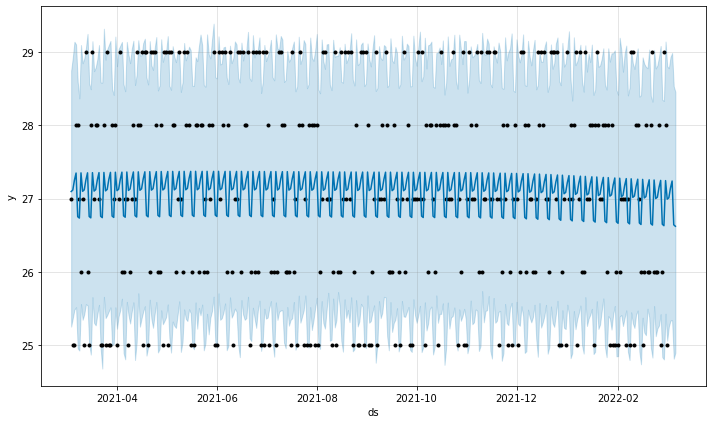

In [34]:
plot1 = m.plot(forecast)

C:\Users\pitha\anaconda3\envs\bit-ml-influxdb\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



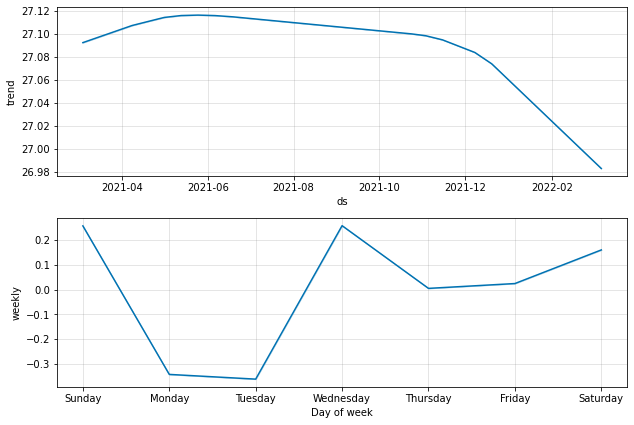

In [35]:
plt2 = m.plot_components(forecast)